# Classification of Iris Datatset:

Methods:

- K -Nearest-Neighbour Classification

- Random Forest Classification

- Logistic Regression

In [3]:
%matplotlib inline

import statsmodels.api as sm
import xlrd
import scipy 

from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Import libraries
from datetime import date
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from statsmodels.tsa.api import VAR
import statsmodels.formula.api as smf
from matplotlib.ticker import FormatStrFormatter
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.ticker as mtick
from matplotlib import rcParams
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import matplotlib.dates as mdates

from datetime import date
from dateutil.relativedelta import relativedelta
mpl.rcParams['figure.figsize'] = [8,5]
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['patch.facecolor']='xkcd:white'


blue1='#1544B1'
blue2='#70BAFF'
red1='#F57775'
grey1='#A7B1C5'
purple2='#108571'

import numpy as np
import pylab as pl
import matplotlib


matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = "10"

import seaborn as sns

sns.set_palette("viridis")

# 1. Data preprocessing

In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris() #Loading the dataset
iris.keys()

iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )


species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

iris.groupby('species').size()

iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 2. Data exploration 

<AxesSubplot: >

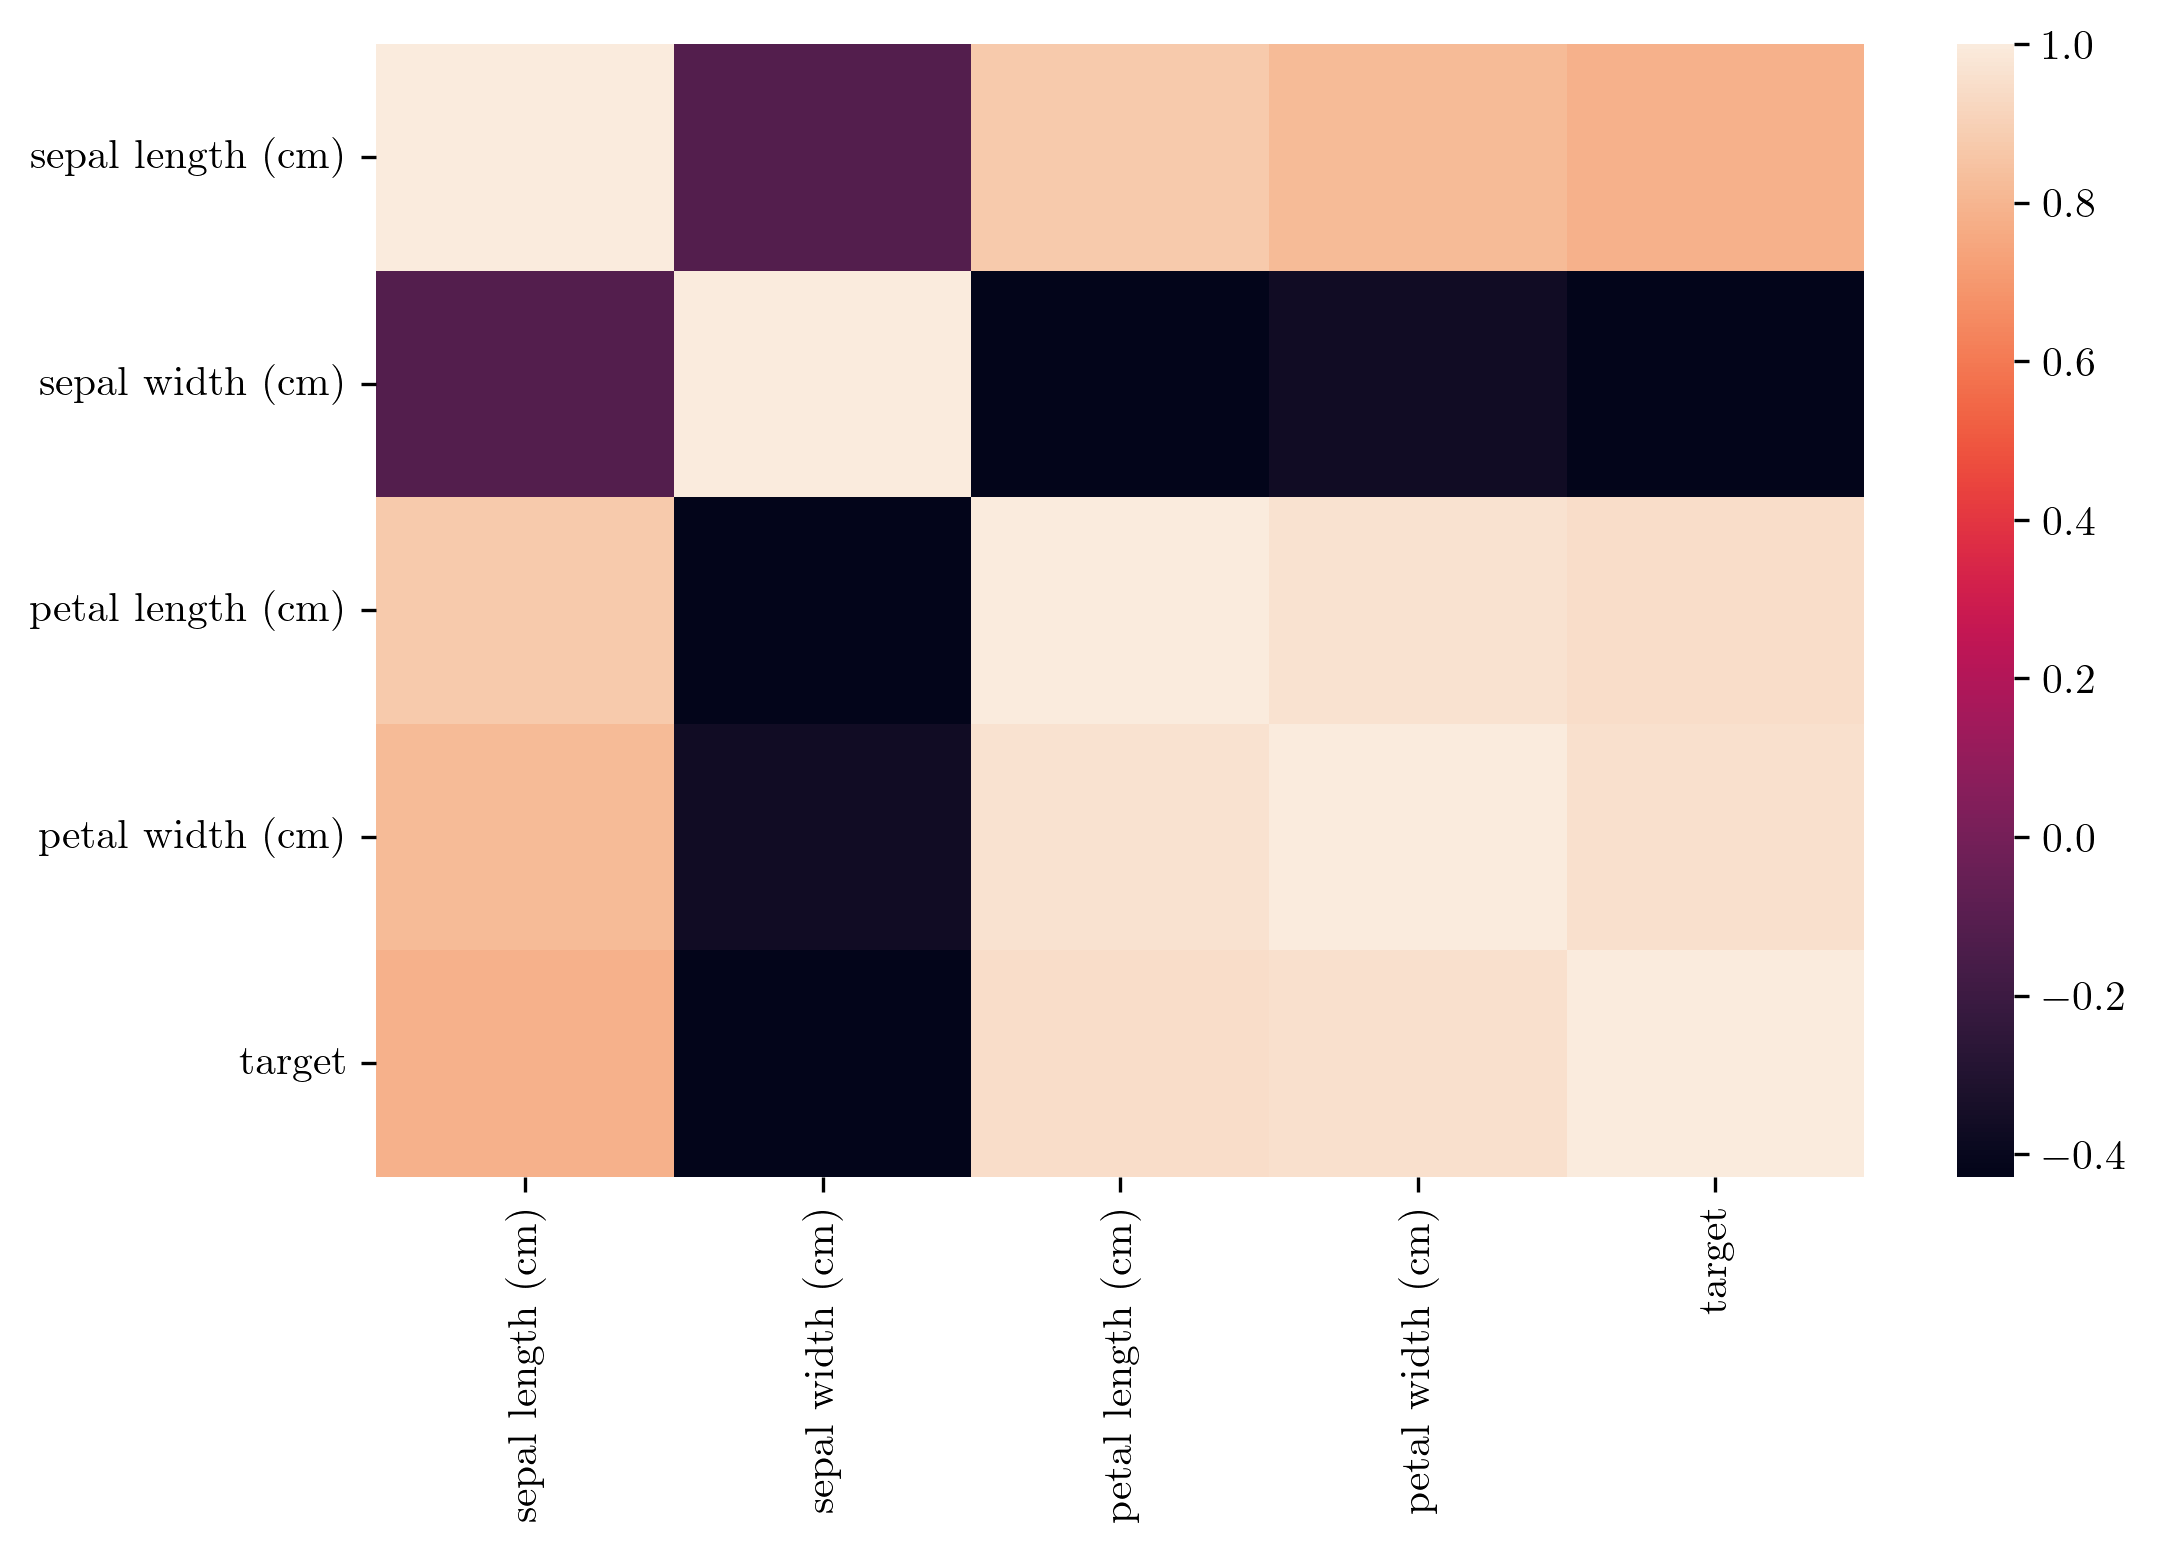

In [5]:
import seaborn as sns
corrmat = iris.corr()

sns.heatmap(corrmat)

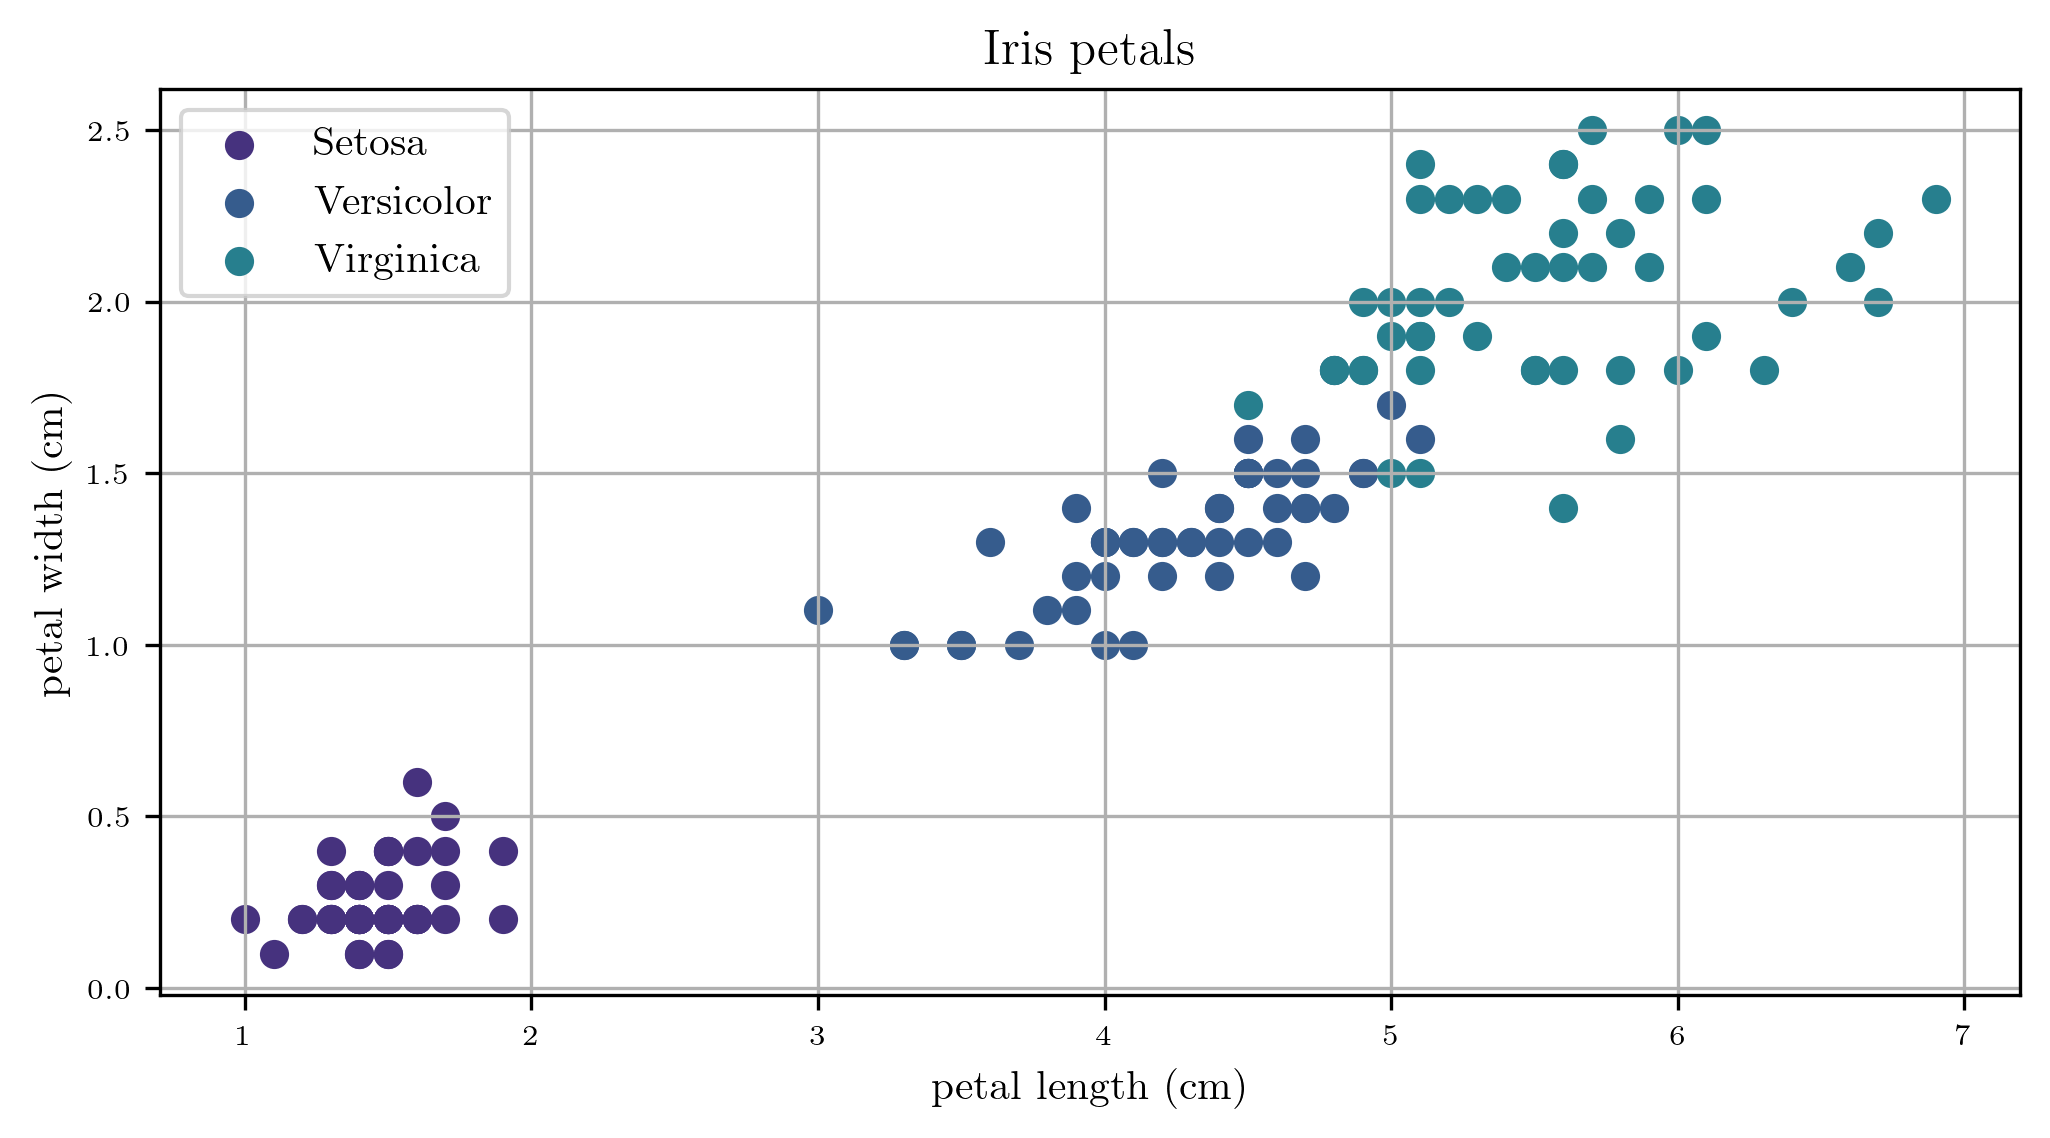

In [13]:
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 
fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('xkcd:white')
setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals",  size=12,  fontweight="bold")
ax.legend()
plt.show()


In [6]:
iris.columns.tolist()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target',
 'species']

# 3. Forecast

## K-Nearest-Neighbors Classifier

The k-NN classifier is a supervised learning algorithm used for classification tasks. It works by finding the k nearest neighbors of a new data point in the feature space and classifying it based on the majority class among the k neighbors.

Assume Test point: $x$

Denote the set of the $k$ nearest neighbors of $x$ as $S_x$. Formally, $S_x$ is defined as $ S_x \subseteq D$ such that $|S_x|=k$ and $\forall (x', y')\in D\setminus S_x, \operatorname{dist}(x, x') \geq \max_{(x'',y'')\in S_x} \operatorname{dist}(x, x'')$, i.e., every point in $D$ but not in $S_x$ is at least as far away from $x$ as the furthest point in $S_x$. We can then define the classifier $h()$ as a function returning the most common label in $S_x$:

$h(x) = \operatorname{mode}({y'': (x'', y'')\in S_x})$,

where $\operatorname{mode}(\cdot)$ means to select the label of the highest occurrence.

 
The k-NN classifier uses a distance metric to measure the similarity between data points. The most commonly used distance metric is the Min Minkowski distance, which is defined as:

$\operatorname{dist}(x,z) = \left( \sum_{r=1}^d |x_r - z_r|^p \right)^{1/p}.$

where $x$ and $z$ are points in the $d$-dimensional space and $p$ is a parameter that determines the "order" of the distance metric.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


For k =  1  :  1.0
For k =  2  :  1.0
For k =  3  :  1.0
For k =  4  :  1.0
For k =  5  :  1.0
For k =  6  :  1.0
For k =  7  :  0.9666666666666667
For k =  8  :  1.0
For k =  9  :  0.9666666666666667
For k =  10  :  0.9666666666666667
For k =  11  :  0.9666666666666667
For k =  12  :  0.9666666666666667
For k =  13  :  0.9666666666666667
For k =  14  :  0.9666666666666667
For k =  15  :  0.9666666666666667
For k =  16  :  0.9666666666666667
For k =  17  :  0.9666666666666667
For k =  18  :  0.9666666666666667
For k =  19  :  0.9666666666666667


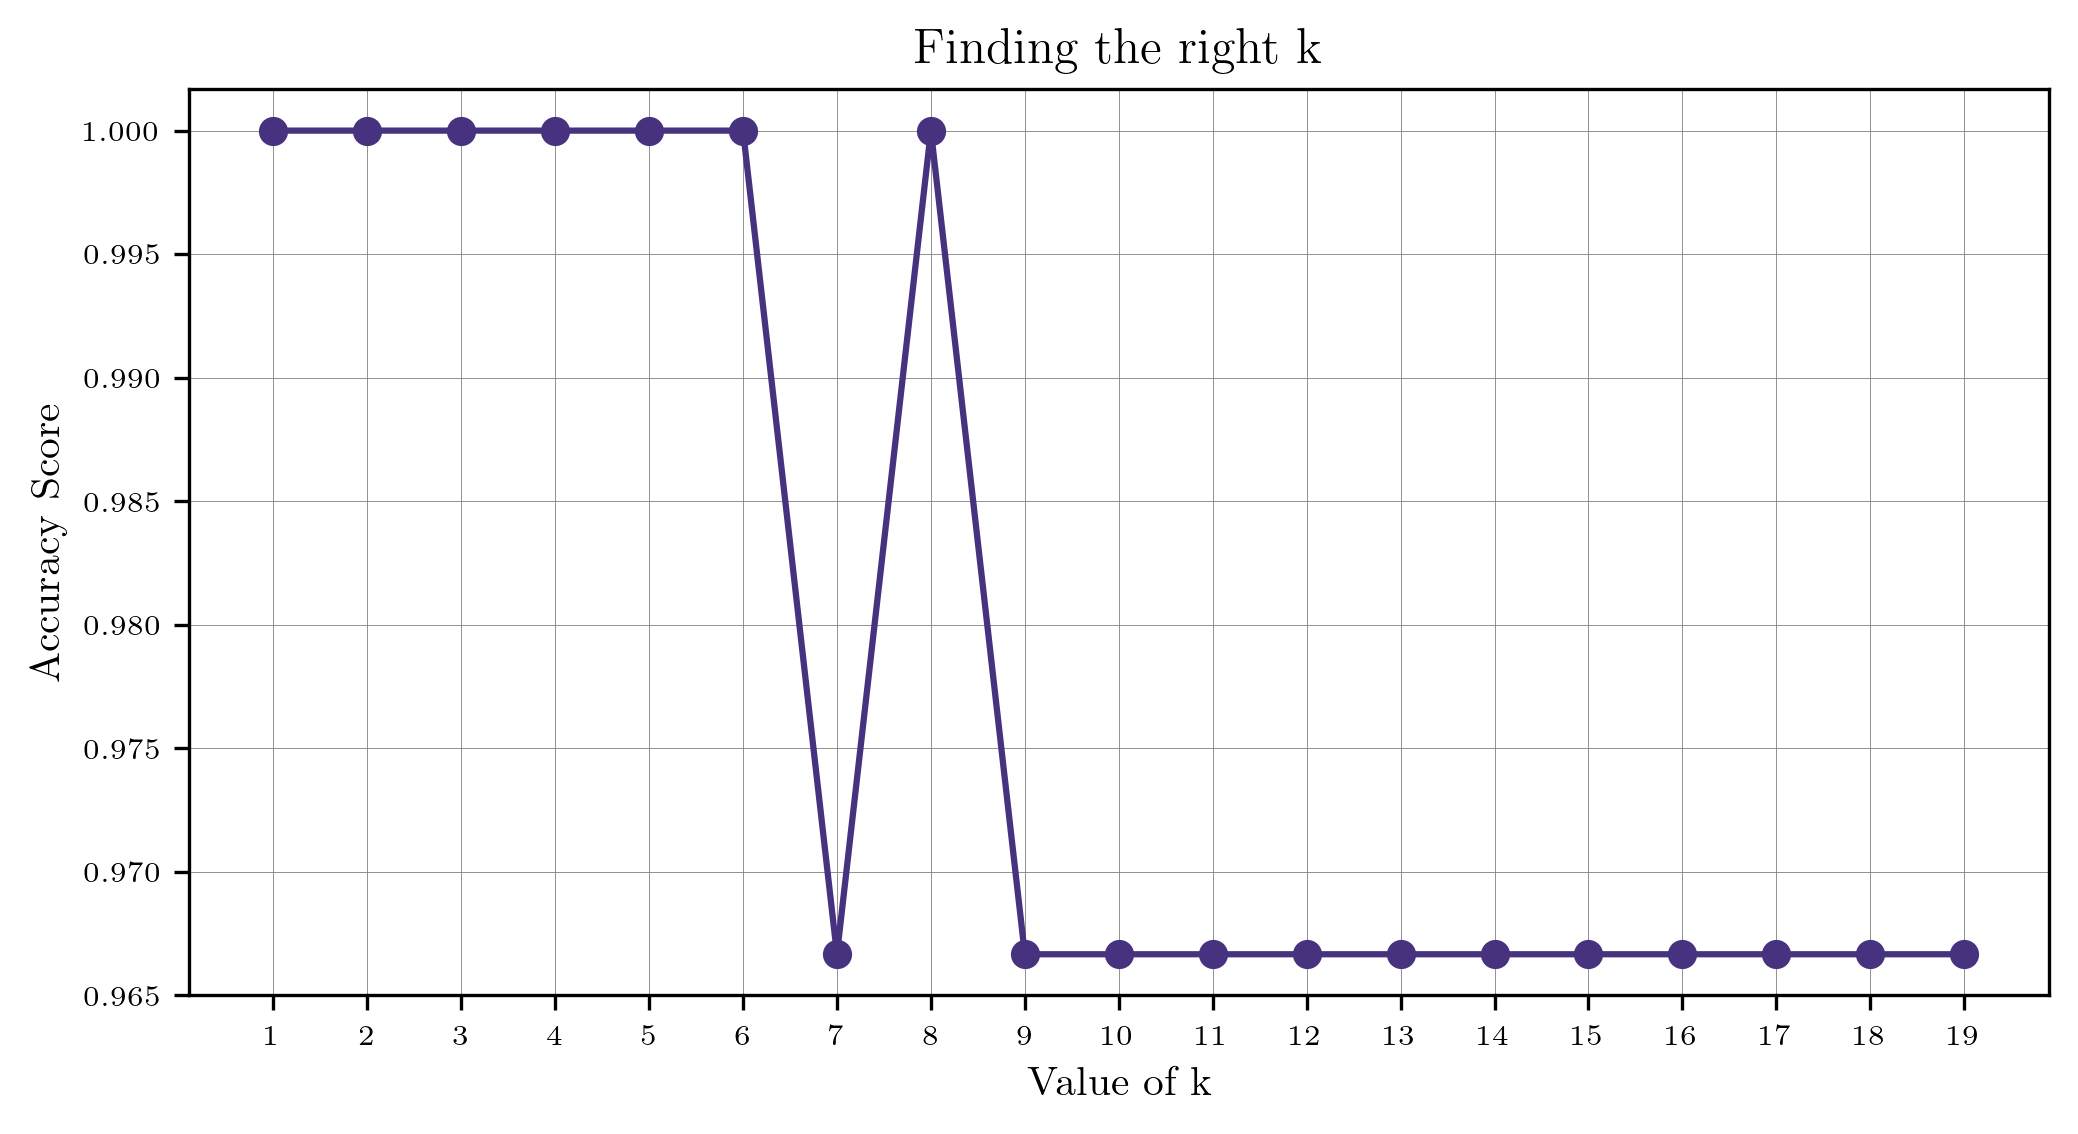

In [8]:

X = iris[['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']]
Y = iris["target"]
X_TEST = iris[['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    print("For k = ",i," : ",accuracy_score(y_test,yhat))
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 
fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('xkcd:white')
plt.title("Finding the right k", fontweight = "bold", size = 12)
ax.set_ylabel("Accuracy Score")


plt.plot(range(1,20),acc, marker = "o")
plt.xlabel("Value of k")

plt.xticks(range(1,20))

ax.legend(loc='upper left', fontsize='x-small', framealpha=0.2, edgecolor='white')
plt.grid(color='grey', linestyle='-', linewidth=0.2)
plt.show()

## Random Forest Classification:

The random forest classifier averages the predictions of the individual decision trees to reduce overfitting and improve generalization performance. This averaging reduces the variance of the model and improves its robustness to noise and outliers.

To make a prediction at a new point x:

using R.F. Regression: 

$\hat{f}{B}_{rf}(x) = \frac{1}{B} \sum_{b=1}^{B} T_b(x; \Theta_b)$

using R.F Classification: 

Let $C_{b}(x)$ be the class prediction of the $b$ th random-forest tree. Then 

$\hat{C_{\text{rf}}^{\text{B}}}(x) = \text{majority vote} \{\hat{C_{b}}(x)\}_{b=1}^B$



After B such trees

$ \{T(x; \Theta_b)\}^{B}_{1} $
1 are grown, the random forest (regression)
predictor is

$$\hat{f}B(x) = \frac{1}{B} \sum{b=1}^{B} T(x;\Theta_b)$$

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train,y_train)
yhat = clf_forest.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))

C:\Users\zwitt\AppData\Local\Temp\ipykernel_26420\814518285.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_forest.fit(X_train,y_train)


Accuracy for training data :  0.7


## Logistic Regression



$$
P(Y=1 \mid \mathbf{x}) = \sigma(\mathbf{w}\cdot \mathbf{x} + b)
$$

and:
$$ P(Y=0 \mid \mathbf{x}) = 1- \sigma(\mathbf{w}\cdot \mathbf{x} + b)
$$
where:

$P(Y=1 \mid \mathbf{x})$ is the probability of the positive class given the input vector $\mathbf{x}$  and
$ P(Y=0 \mid \mathbf{x}) $ is the probabillity for label 0 given input vector x.
$\sigma(\cdot)$ is the sigmoid function, defined as $\sigma(z) = \frac{1}{1 + e^{-z}} = \frac{1}{1 +\exp(-z)}$.´

$\mathbf{x}$ is a vector of input features, where each xi is a feature value of the input instance.

$\mathbf{w}$ is a vector of weights, where each weight $w_i$ is associated with an input feature $x_i$ and represents the importance of that feature for the classification decision.
$b$ is the bias term or intercept, which is a scalar added to the weighted sum of the input features.


In [26]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
X = iris.drop(['target','species'], axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

yhat =log_reg.predict(X_train)

training_prediction = log_reg.predict(X_train)
test_prediction = log_reg.predict(X_test)
print("accuracy on training data",accuracy_score(y_train,training_prediction))


accuracy on training data 0.9583333333333334


In [15]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        40
         1.0      0.950     0.927     0.938        41
         2.0      0.925     0.949     0.937        39

    accuracy                          0.958       120
   macro avg      0.958     0.959     0.958       120
weighted avg      0.959     0.958     0.958       120

[[40  0  0]
 [ 0 38  3]
 [ 0  2 37]]


# Conclusion: 

For the Iris dataset, the Logistic regression scaled the best results with an accuracy score of around 0.95

# Sources: 

K-NN: https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html#:~:text=The%20k%2Dnearest%20neighbor%20classifier,%7Cp)1%2Fp.

K-NN:https://www.cs.cornell.edu/courses/cs4780/2017sp/lectures/lecturenote02_kNN.html

Logistic Regression: https://web.stanford.edu/~jurafsky/slp3/5.pdf

Random-Forest: https://www.math.mcgill.ca/yyang/resources/doc/randomforest.pdf